<div style="border:solid purple 2px; padding: 20px">

<h2 style="color: brown">Computer game sales research</h2>

We have historical data from open sources on game sales, user and expert reviews, genres and platforms (e.g. Xbox or PlayStation).
    
**Purpose of the project** - to identify patterns that determine game success and highlight popular products for 2017 sales forecasting and advertising campaign planning.
    
The research will involve the following 6 steps:
 1. Data overview.
 2. Data pre-processing.
 3. Exploratory data analysis.
 4. Creating a portrait of the user in each region (North America, Europe, and Japan).
 5. Hypothesis testing.
 6. General conclusion regarding the results of the analysis.
    
<img src="https://img.freepik.com/free-vector/flat-game-streamer-concept-elements_23-2148929677.jpg" width="500" height="500" alt="Gaming equipment" />

### Data description

* NA_sales - sales in North America (millions of copies sold)
* EU_sales - European sales (millions of copies sold)
* JP_sales - sales in Japan (millions of copies sold)
* Other_sales - sales in other countries (millions of copies sold)
* Critic_Score - critics score (max. 100)
* User_Score - user rating (max. 10)
* Rating - rating from the Entertainment Software Rating Board (ESRB). This association determines the rating of computer games and assigns them the appropriate age category.

### Preparing for work

In [1]:
# Library loading

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats as st
from skimpy import skim, clean_columns
import ydata_profiling
import datetime as dt
from IPython.display import display_html

In [2]:
# Setting parameters

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

### Data overview

In [4]:
# Read file with input data

data = pd.read_csv('./games.csv')

In [5]:
# Output the first 5 lines of the dataframe

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Let's convert the column names to lower case using the clean_columns method

data = clean_columns(data)

11 column names have been cleaned

In [7]:
# Let's check and re-display the first lines

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


The columns are renamed. Next we will display general information about the dataframe.

In [8]:
report = data.profile_report(
    title='Games dataset analysis',
    # We will exclude certain information tabs that we do not need at this time
    correlations=None,
    missing_diagrams=None,
    duplicates=None,
    interactions=None
)

In [9]:
# Report output

display(report);

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* There are 11 columns and 16715 rows (observations) in the data. There are missing values in the columns `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. According to the histograms obtained for the numeric columns, we can observe a normal distribution of the data (histograms with sales are not indicative). However, we notice that in the column `user_score` (max 10) there is a non-numerical value 'tbd'. We will process the data in a further analysis.

## Data pre-processing

#### Analysis of data types

We consider the types of data in each column.

In [10]:
# Outputs the types of values in the columns using the dtypes attribute

data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

According to the results, we observe that the `user_score` (string type instead of numeric) and `year_of_release` (real type instead of datetime) columns have incorrect data type.
___

* **user_score**

We noticed earlier that the `user_score` column has values ('tbd') that cause the column to have a string datatype. Let's see what values are stored in this column.

In [11]:
# Use the unique() method to display a list of unique values

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The `user_score` column has the abbreviation 'tbd', which stands for 'to be determined' and means that there is no score yet. So we can replace all cells with 'tbd' with 'NaN' and bring them to the correct (real) data type.

In [12]:
# Replace the values

data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [13]:
# Replace the data type using the astype () method

data['user_score'] = data['user_score'].astype('float')

Let's check if our transformations have been performed.

In [14]:
data['user_score'].dtypes

dtype('float64')

The data has the correct type now.
___

* **year_of_release**

We noticed earlier that there are missing values in the `year_of_release` column. Before we proceed to convert the data type in the column, let's first eliminate the gaps. To understand exactly how to handle the gaps, let's look at the table with empty values in this column.

In [15]:
# Output the table with empty values in the year_of_release column using the isna() method

data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


So in the `year_of_release` column we have **269** missing values (**1.6%** of the sample). 

***Possible reasons for the omissions:*** given that the data was collected from open sources, we can assume that the data was not automatically populated with the necessary attributes and thus the values were left blank. It could also be that the sources themselves did not have all the data. 

Filling in the blanks with the median will not be correct in this case because it may bias the estimates. We also cannot leave cells blank, as this would prevent further analysis. Under these circumstances, and taking into account the insignificant proportion of gaps relative to the total sample, we will choose to remove all missing values in the year_of_release column.

In [16]:
# Remove rows with gaps in the column using the dropna () method

data = data.dropna(subset = ['year_of_release'])

Let's check the **shape** attribute to see how many rows were deleted.

In [17]:
# Output table size

data.shape

(16446, 11)

The result showed that the number of observations decreased by exactly the number of gaps in the `year_of_release` column (by 269). Next, we convert the column to the datetime type.

In [18]:
# Do the conversion with the to_datetime function

data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y').dt.year

Let's check transformations performed.

In [19]:
data['year_of_release'].dtypes

dtype('int64')

For convenience all columns have been converted to the correct data types.

#### Handling missing data

Let's check for missing values in our data. We display the results as a percentage of the total sample.

In [20]:
# Let's calculate the skip fraction and convert the values to integer type

skips = pd.DataFrame(round(data.isna().mean()*100)).astype(int)

# Renaming of the column name

skips.columns = ['Skip fraction (%)']

# Sort the values in descending order and style the table

skips.sort_values(by='Skip fraction (%)', ascending=False).style.background_gradient('coolwarm')

,Skip fraction (%)
user_score,55
critic_score,51
rating,41
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0


* **The omission** of such large and comparable numbers in the user_score, critic_score, and rating columns **can be justified** by the fact that game review and critic aggregator sites, as well as the Entertainment Software Rating Board (ESRB) itself, have only been around since 2000 (the ESRB was founded in 1994; by early 2003, over 8000 products had received ESRB ratings). However, our sample covers historical data since 1980. Thus, there are games in our dataframe that did not receive ratings due to the lack of appropriate platforms and organizations.

##### Handling missing values in the `user_score` and `critic_score` columns

First, let's look at the table with the missing values in the columns.

In [21]:
# Output the table with empty values in the user_score column

data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 8983 missing values in the `user_score` column (55% of the sample).

In [22]:
# Output the table with empty values in the critic_score column

data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 8,463 missing values in the `critic_score` column (51% of the sample).

* The **user_score** and **critic_score** columns are numeric columns. Taking into account the large proportion of missing values in them, as well as the risk of biased estimates in case they are filled with the median value, we will use the indicator value ("stub") for their processing, which will definitely not occur in our array. The values in **critic_score** range from 0 to 100, in **user_score** from 0 to 10. Let us take the value (-1) as an indicator. We will replace it with the fillna() method.

In [23]:
# Replace all missing values in the user_score column with the indicator value using the fillna() method

data['user_score'] = data['user_score'].fillna(-1)

In [24]:
# Replace all missing values in the critic_score column with the indicator value

data['critic_score'] = data['critic_score'].fillna(-1)

***Note***: *We take these "stubs" into account in further analysis for hypothesis testing and calculation of Pearson correlation coefficients.*

##### Handling missing values in the **rating** column (rating from the ESRB organization)

Let's look at the table with the missing values in the column.

In [25]:
# Let's output the table with empty values using isna()

data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


There are 6,678 omissions in the `rating` column (41% of the sample).

* The **rating** column has a string data type. Before selecting the gaps handling method, let's first look at the values stored in the column.

In [26]:
# List of unique values

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

So, we got a list of abbreviations of computer game ratings, which are assigned according to the appropriate age category.

According to the information taken from open sources, the description of the ratings is as follows:

**ESRB Ratings**:

* "EC" (Early Childhood)
* "E" (For Everyone)
* "E10+" (Everyone 10 and older)
* "T" (Teen)
* "Mature" (For Adults)
* "AO" (Adults 18+ Only)
* "RP" (Rating Pending)

You may notice that our list of unique values in the **rating** column includes the abbreviation "K-A", which does not appear in the current list of ESRB ratings. This is because we are working with historical data that includes information from 1980 onwards. The 'K-A' ("Kids to Adults") rating was used until 1998. Since 1998, its current name has been "E" ("Everyone"). Given the above, let's replace the values with the "K-A" rating with the "E" rating.

In [27]:
# Replace the values

data['rating'] = data['rating'].replace('K-A','E')

In order not to lose rows with important data, let's process the omissions by filling in the missing values in the `rating` column with an identical rating value of "RP" (unrated data).

In [28]:
# Gaps replacement

data['rating'] = data['rating'].fillna('RP')

Now let's check which columns still have missing values:

In [29]:
# Count the number of gaps in the data frame

data.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

There are two gaps in the `name` and `genre` columns each. Let's output the tables with these gaps.

In [30]:
# Print the table with the empty values in the name column

data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,RP


In [31]:
# Print the table with the empty values in the genre column

data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,RP


As you can see from the tables, the rows with blank values in the `name` and `genre` columns are identical. Since their number is insignificant, let's remove these blank rows from our sample.

In [32]:
# Remove rows with gaps in the column

data = data.dropna(subset = ['name'])

Let's check how many lines were deleted:

In [33]:
# Output table size

data.shape

(16444, 11)

The number of observations is reduced by the number of omissions (by 2). The work on gaps processing is finished, and we can move on to the next stage.

#### Check for duplicates.

In [34]:
# Counting explicit duplicates

data.duplicated().sum()

0

There are no **explicit duplicates.**

Let's try to find **implicit duplicates** in the columns that characterize the names of games and platforms.

In [35]:
# Let's check for duplicates when values in different columns match using the subset parameter

data[data.duplicated(subset=['name','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


This check gave us three duplicates. Let's see what kind of duplicates they are. Let's show all rows with the names of the games "Need for Speed: Most Wanted" and "Madden NFL 13".

In [36]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,-1.0,-1.0,RP
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,-1.0,-1.0,RP
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,-1.0,-1.0,RP
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


We see a match in the name of the game and the platform in the lines with indices 5972 and 11715. They also have the same score and rating, but the year of release and sales are different.

In [37]:
data.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1.0,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In the case of the game "Madden NFL 13", we see that the lines with the indexes 604 and 16230 provide the same game name, platform, year of release, score and rating, but different sales volumes.

Thus, in spite of the individual coincidence of parameters in some observations, the number of sold copies in the regions is very different. In another case, the year of release is also different. This could mean that special re-releases of the games were released for some platforms, which may not differ in content, but include some valuable material for fans. Therefore, we will save the identified duplicates, as in the future we will compare total sales by platform, where these observations will be summarized.

#### Calculation of total sales in all regions

In [38]:
# Total sales in all regions will be recorded in the new column

data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

___
**Conclusion.**

* In the preprocessing phase we replaced all cells from 'tbd' to 'NaN' in the `user_score` column and converted it to the correct datatype (float). 

* We removed the missing values from the `year_of_release` column and converted it to the datetime datatype. 

* We handled the missing values for the `user_score`, `critic_score` and `rating` columns by identifying the possible reasons for them and decided to replace the missing values with indicators ("stubs") to avoid bias in the estimates and to preserve the representativeness of the sample. In the columns `name` and `genre` we have removed the missing values.

* We replaced the abbreviation "K-A" ("Kids to Adults") with "E" ("Everyone") in the `rating` column. 

* We detected and examined implicit duplicates.

The data is pre-processed, and now we can start exploratory analysis of the data.
___

### Exploratory data analysis

First, let's look at game sales in different years.

In [39]:
# let's create a summary table to summarize the data by year in terms of sales by region

sales = data.pivot_table(index = 'year_of_release', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], \
                         aggfunc = 'sum').astype('int64')

In [40]:
# Since the release years are stored as indexes in the table, let's create a new column for them

sales['year_of_release'] = sales.index

In [41]:
# Use the Melt function to convert columns to rows to further build a histogram with accumulation

melt = sales.melt(id_vars='year_of_release', value_name='sales_value', var_name='sales_region')

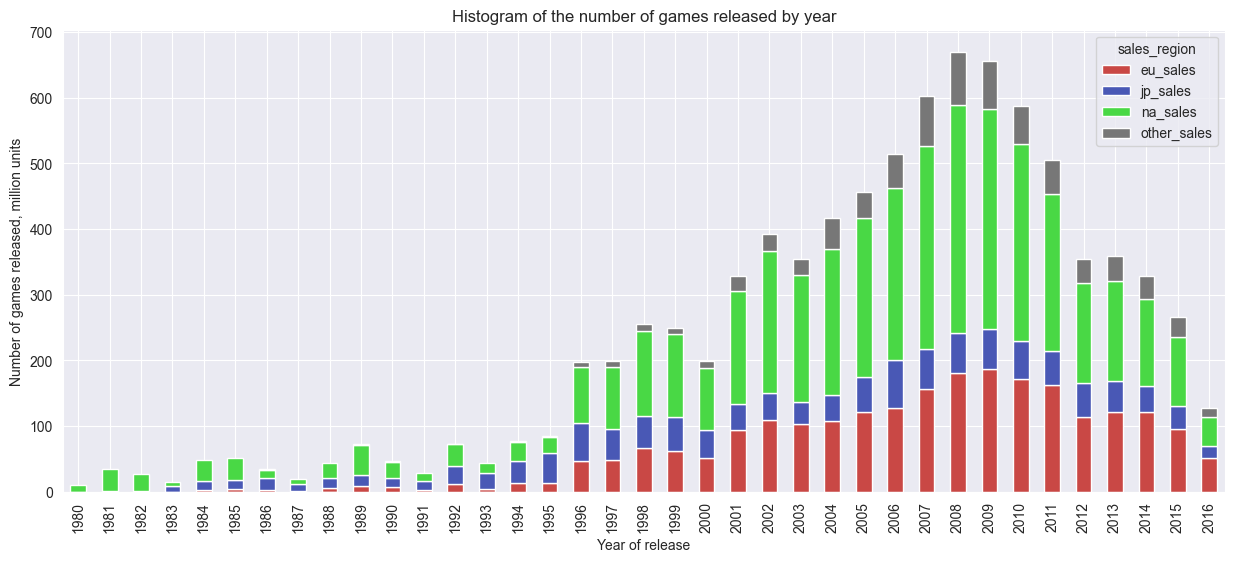

In [42]:
# Game summary table for the histogram

pivoted = pd.pivot_table(melt, index='year_of_release', columns='sales_region', values='sales_value', \
                         aggfunc='sum')

# set parameters for plotting

pivoted.plot.bar(stacked=True, figsize=(15, 6), color=['#C94845', '#4958B5', '#49D845', '#777777']);
plt.title('Histogram of the number of games released by year')
plt.xlabel('Year of release')
plt.ylabel('Number of games released, million units');

* Judging by the plot, we can see that the popularity of computer games began to grow in 1996 (thanks to technological advances). Thus, in 1996 the "Voodoo I" was born - the first video card with 3D graphics support. During this period, "Duke Nukem 3D" and "Quake" were released - the first fully three-dimensional games. It was also the birth year for such games like "Super Mario", "Command & Conquer: Red Alert", "Tomb Raider", "Resident Evil", "Diablo" and many others. The year 1998 saw the release of "Half-Life" and "StarCraft", games that are still very popular today.
* Until 2008 we have seen an increase in the popularity of computer games, the market was growing dynamically, and the total sales were increasing. The peak of games' popularity was in 2008-2009. After 2009, there is a downward trend in sales, which may be due to the emergence of iOS and Android mobile platforms during this period and a shift in emphasis in favor of mobile games.
* Most games are sold in North America, with Europe coming second, and significantly less in Japan and other countries.

Next, let's see how sales varied by platform. Let's select the platforms with the highest total revenue and plot the distribution by year.

In [43]:
# Let's create a summary table to summarize the data on total sales by platform

sales_on_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
sales_on_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


* So, judging by the data obtained, we can see that for the whole period in question **the highest total sales** was achieved on 6 game platforms - **PS2, X360, PS3, Wii, DS, PS**. 

Let's keep the top 6 platforms mentioned above in a separate data frame and see how their sales are distributed by years (for the clarity of the data we will take the period from 2000 to 2016).

In [44]:
# Save the values with highest sales in a separate table

top_6_filt = sales_on_platform.head(6)

In [45]:
# To visualize the data, let's create a summary table

data_pivot_sales_per_year_by_platform = data.pivot_table(index = 'year_of_release', columns = 'platform', 
                                                           values = 'total_sales', aggfunc = 'sum')
plot_table = data_pivot_sales_per_year_by_platform[top_6_filt.index]

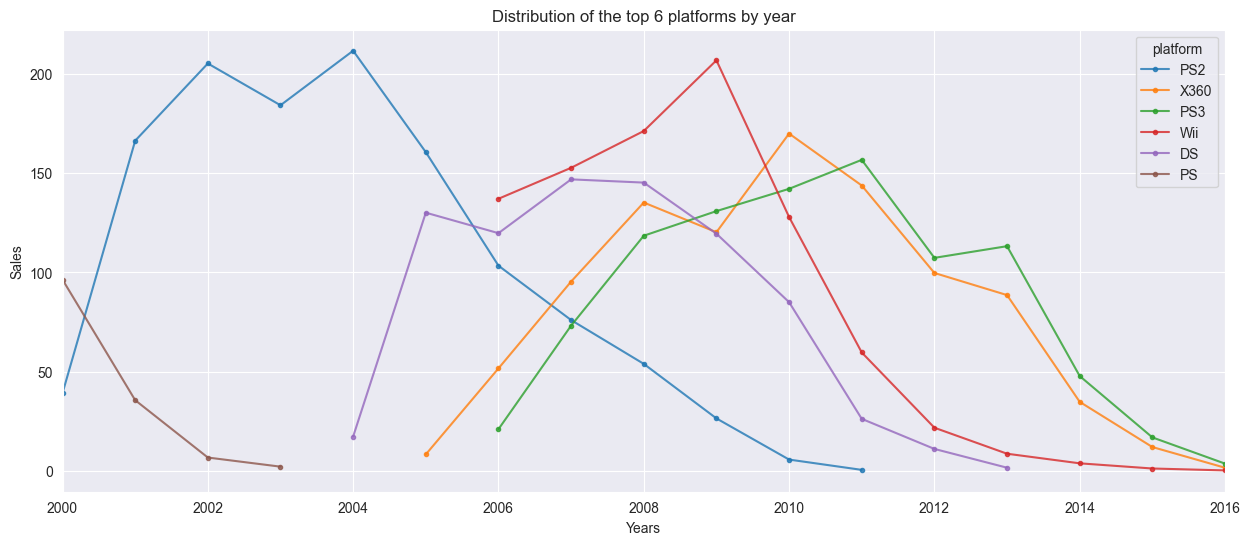

In [46]:
# plotting a graph with specified parameters

plot = plot_table.plot(figsize=(15,6), legend=True, grid=True, alpha=0.8, 
                  title='Distribution of the top 6 platforms by year', xlim=(2000,2016), style='.-')
plot.set_xlabel('Years'), plot.set_ylabel('Sales')
plt.show()

* Based on the obtained graph, we can conclude that the average life cycle of the platform is about 10 years. At the moment there is a decline in all platforms, some have already lost their relevance by 2016 (PS, PS2, DS). From 2000 to 2016, PS2 and Wii had the highest sales. In 2016, platforms like Wii, X360, PS2 are still relevant.

So we set the platform lifecycle to 10 years. Next, we determine the average value of the period from platform release to peak revenue (the difference between the maximum and minimum revenue value).

In [47]:
# Create a summary table by year with minimum and maximum values by platform

life_cycle = data.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min', 'max'])

# rename the columns

life_cycle.columns = ['Min sales', 'Max sales']

# calculate the value difference and save it in a separate column

life_cycle['The period of popularity'] = life_cycle['Max sales'] - life_cycle['Min sales']

# output the resulting table with sorting

display(life_cycle.sort_values(by = 'The period of popularity', ascending = False).head(20))

,Min sales,Max sales,The period of popularity
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


In [48]:
# Let's calculate and output the average value of the popularity period of the platform

platform_years = life_cycle['The period of popularity'].mean()
platform_years

7.612903225806452

* On average, the popularity of a platform lasts about 7 years (except for platforms like PC and DS). After that sales decline.

To predict for 2017, taking into account the analysis, as well as the dynamics of development and changes in trends in the computer games industry, for further analysis we define **the actual period in the range from 2013 to 2016** and discard data for previous years.

In [49]:
# A slice of the data for the current period is stored in a new data frame

actual_period = data.query('year_of_release >= 2013').copy()

Next, let's see how all the platforms are distributed in a given actual period.

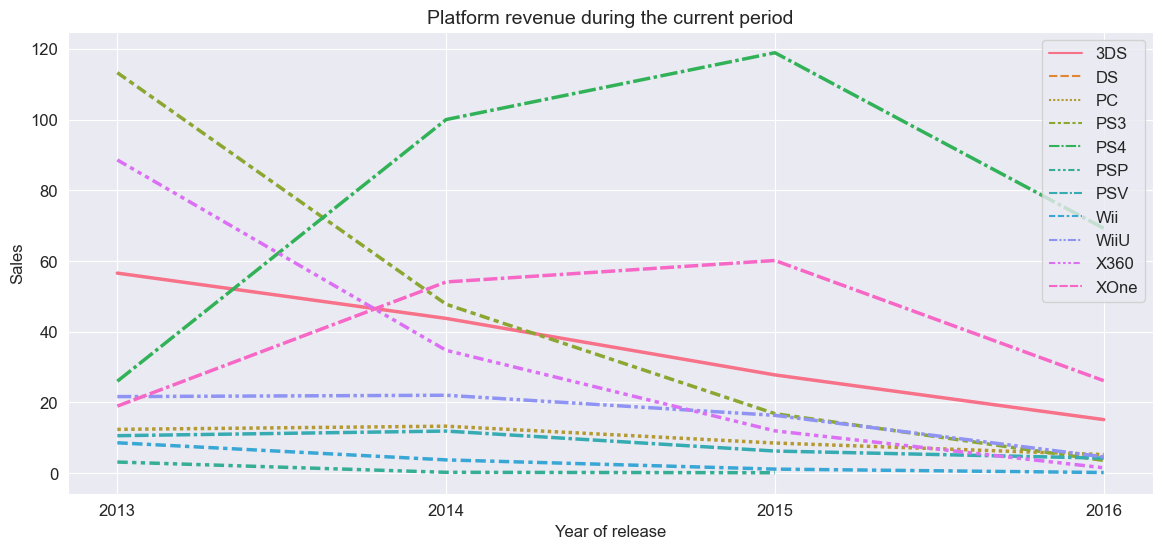

In [50]:
# Create a pivot table to visualize the graph

actual_period_pivot_table = actual_period.pivot_table(index='year_of_release', columns='platform',
                                                      values='total_sales', aggfunc='sum')

# Set parameters for the graph

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.lineplot(data=actual_period_pivot_table, linewidth=2.5)
plt.title('Platform revenue during the current period', fontsize=14)
plt.xlabel('Year of release', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks([2013, 2014, 2015, 2016], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# display the graph

plt.show()

* Given a selection of **actual data**, the **leaders** in sales were **PS3, PS4, X360**. All platforms are in a gradual decline in sales. **In 2016, the PS4, 3DS, and XOne** were the sales leaders. Given the year of release of these platforms (2013, 2011, and 2013 respectively) and the average period of platform popularity (about 7 years), **potentially profitable of them could be PS4 and XOne.**

Let's determine the most profitable platforms by comparing the total revenue values by platform. Let's display the results in a table.

In [57]:
# Create a pivot table for the current period of sales by platform

actual_period_top = actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                                 .sort_values(by='total_sales', ascending=False)

# For clarity, we set up a descending sort of data

actual_period_top = actual_period_top.sort_values('total_sales', ascending=False).head(10)
actual_period_top

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


* Based on the results, the **top 5 profitable platforms are PS4, PS3, XOne, 3DS and X360.**

In [58]:
# Create a list of the top 5 platforms and store it in a separate variable

top_5_platforms = actual_period_top.index[:5].tolist()
top_5_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360']

In [59]:
# Save data to a separate dataframe for the selected top 5 platforms only

actual_period_top_5 = actual_period[actual_period['platform'].isin(top_5_platforms)]

Next, we create boxplots for global game sales by platform. 

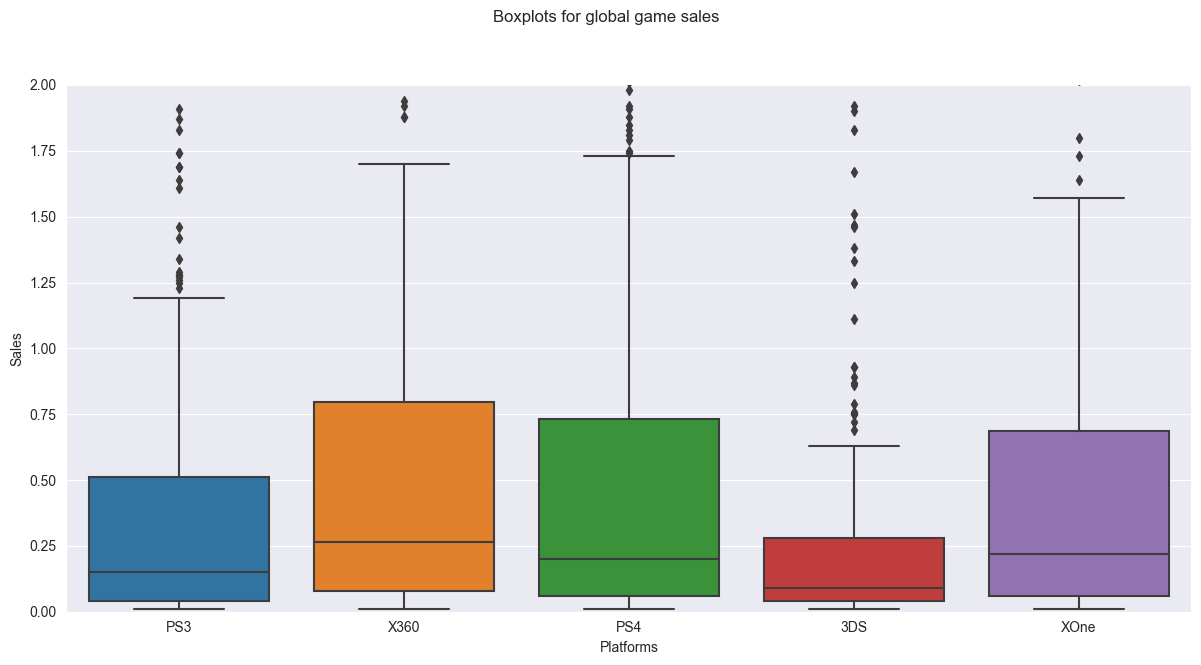

In [60]:
# Set parameters and output boxplots

plot_actual = sns.catplot(data=actual_period_top_5, x='platform', y='total_sales', kind='box', height=6, 
                          aspect=2)
plot_actual.set(ylim=(0, 2))
plot_actual.set_axis_labels(x_var='Platforms', y_var='Sales')
plot_actual.fig.suptitle('Boxplots for global game sales', y=1.1);

We have obtained boxplots that do not show the median data very clearly. Therefore, to compare the values and to draw more reasonable conclusions, we will make an additional graph in which only the lower part of the boxplots will be displayed, limiting the sample from above with the parameter ylim.

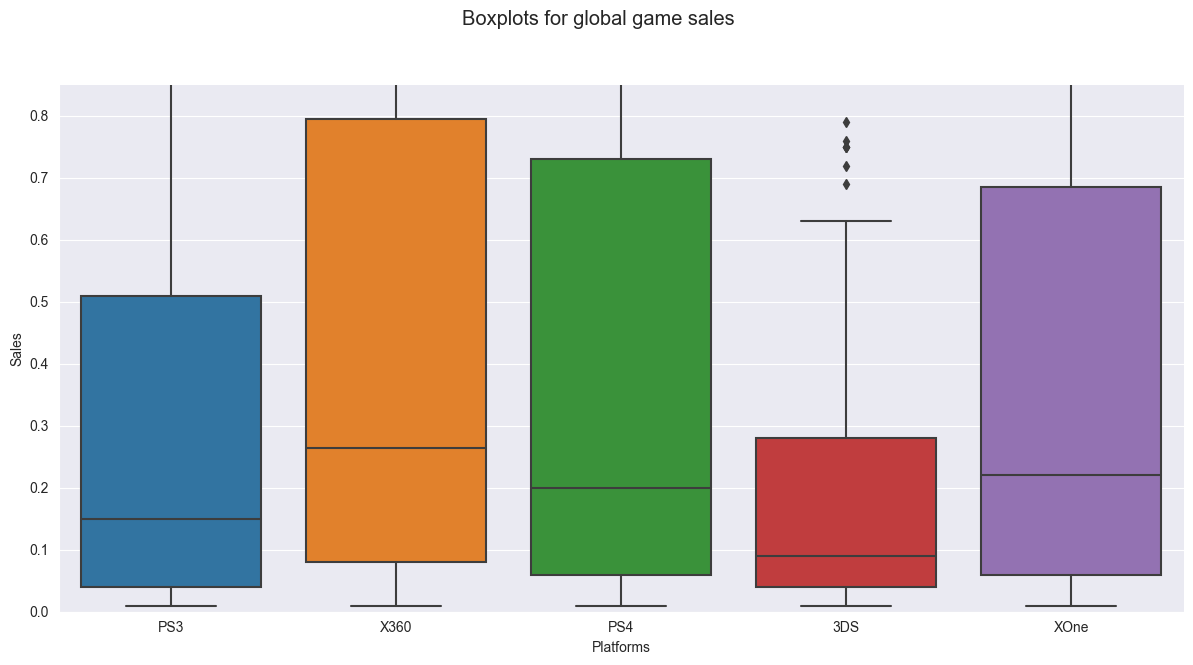

In [61]:
plot_actual = sns.catplot(data=actual_period_top_5, x='platform', y='total_sales', kind='box', height=6, 
                          aspect=2)
plot_actual.set(ylim=(0, 0.85))
sns.set(rc={"figure.figsize":(20, 10)})
plot_actual.set_axis_labels(x_var='Platforms', y_var='Sales')
plot_actual.fig.suptitle('Boxplots for global game sales', y=1.1);

Now we could see that the median and the 75th quantile are **biggest for the X360**, **second place** in the median is taken by **XOne**, but the 75th quantile refers to **PS4**, which in turn is **third place in the median.** So the most popular platforms are X360, PS4, and XOne: these platforms have the highest median and the majority of the values are above it. The 3DS has the lowest sales.

#### The Impact of Reviews by Users and Critics on Sales

Let's see how sales within a popular platform **PS4** are influenced by user and critic reviews. Let's create a scatterplot and calculate the correlation between reviews and sales.

In [62]:
# Highlight the data related to the PS4 platform and store it in a separate variable

platform_ps4 = actual_period[actual_period['platform']=='PS4']

# To display the result correctly, we will exclude the "stub" values from the user score column

corr_platform_ps4_user = (platform_ps4['user_score'] != -1).corr(platform_ps4['total_sales'])

# Output of the result

print ('Correlation between user scores and total sales:', corr_platform_ps4_user)

# To display the result correctly, we will exclude the "stub" values from the critic score column

corr_platform_ps4_critic = (platform_ps4['critic_score'] != -1).corr(platform_ps4['total_sales'])

# Output of the result

print ('Correlation between critic scores and total sales:', corr_platform_ps4_critic)

Correlation between user scores and total sales: 0.13014500702627876
Correlation between critic scores and total sales: 0.14090870943442674


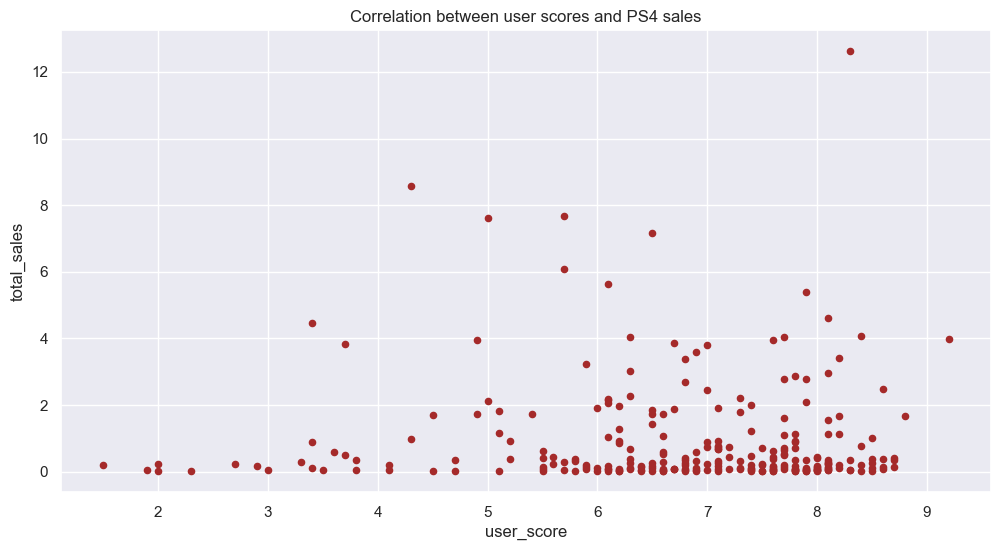

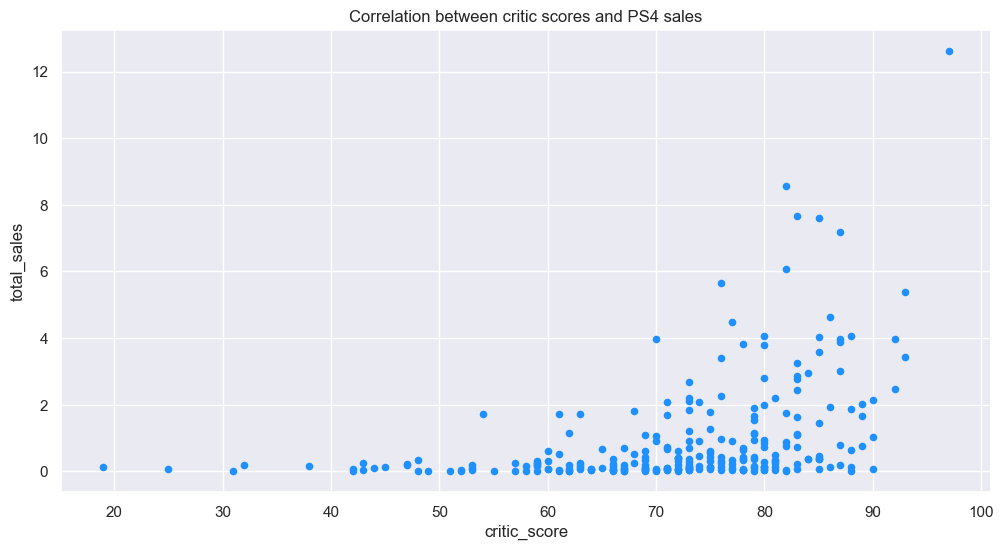

In [63]:
# To display the results correctly, let's exclude the "stub" values and set the parameters for plotting

platform_ps4[platform_ps4['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales', \
                                                    color='brown', figsize=(12, 6))
plt.title('Correlation between user scores and PS4 sales');
platform_ps4[platform_ps4['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales', \
                                                      color='dodgerblue', figsize=(12, 6))
plt.title('Correlation between critic scores and PS4 sales');

* According to the resulting graphs, we see that there is a **very weak direct correlation** between the scores for PS4 games (by critics and users) and their sales volume.

Let's compare the results with the sales results for games on other popular platforms.

In [64]:
# Let's create a function that allows us to graph and calculate correlations for all the top 5 platforms

def all_platform(platform_name):
    platform = actual_period[actual_period['platform']==platform_name]
    platform[platform['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales', \
                                                color='brown', figsize=(12,6))
    plt.title(platform_name, fontsize=15)
    platform[platform['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales', \
                                                  color='dodgerblue', figsize=(12,6))
    plt.show();
    
    print('Correlation between user scores and sales:', \
          (platform['user_score'] != -1).corr(platform['total_sales']))
    print('Correlation between critic scores and sales:', \
          (platform['critic_score'] != -1).corr(platform['total_sales']))

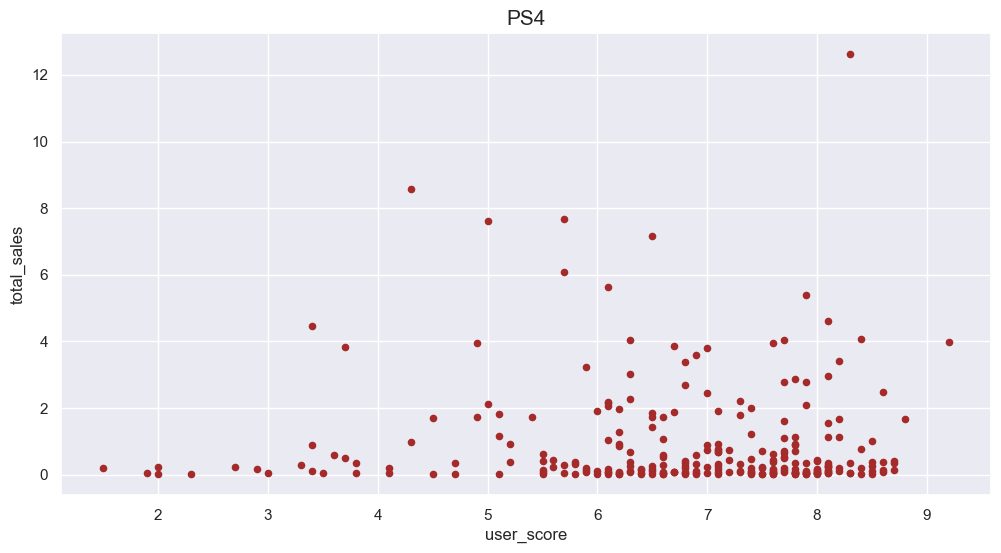

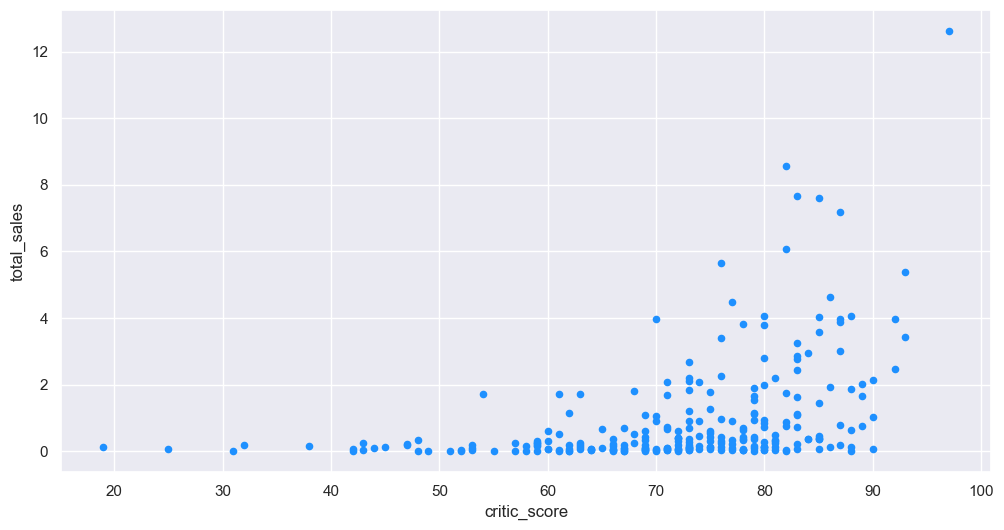

Correlation between user scores and sales: 0.13014500702627876
Correlation between critic scores and sales: 0.14090870943442674


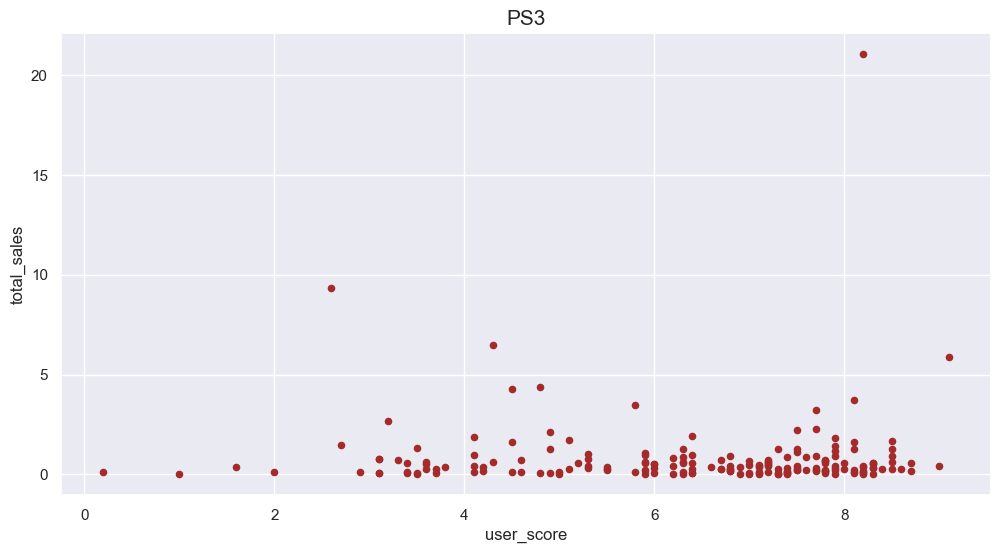

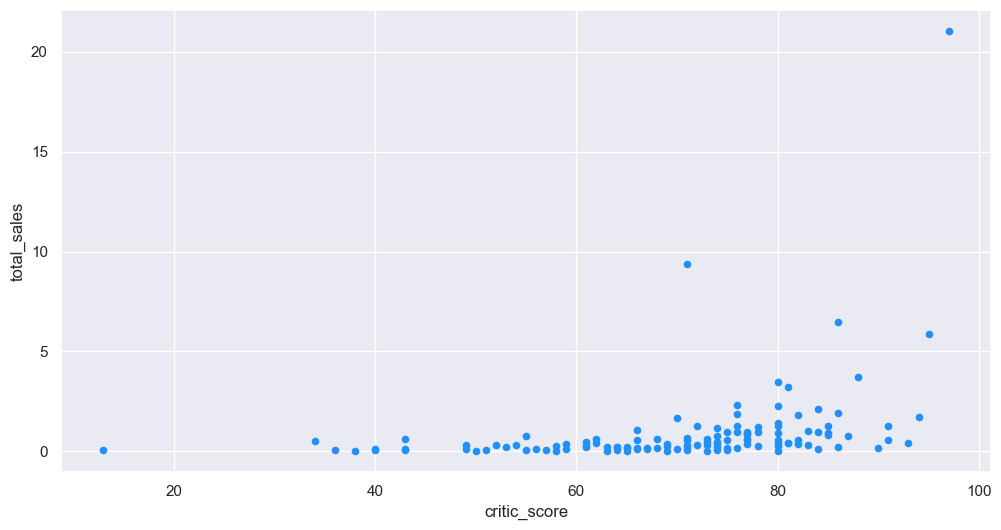

Correlation between user scores and sales: 0.2179269876490744
Correlation between critic scores and sales: 0.21131156841464813


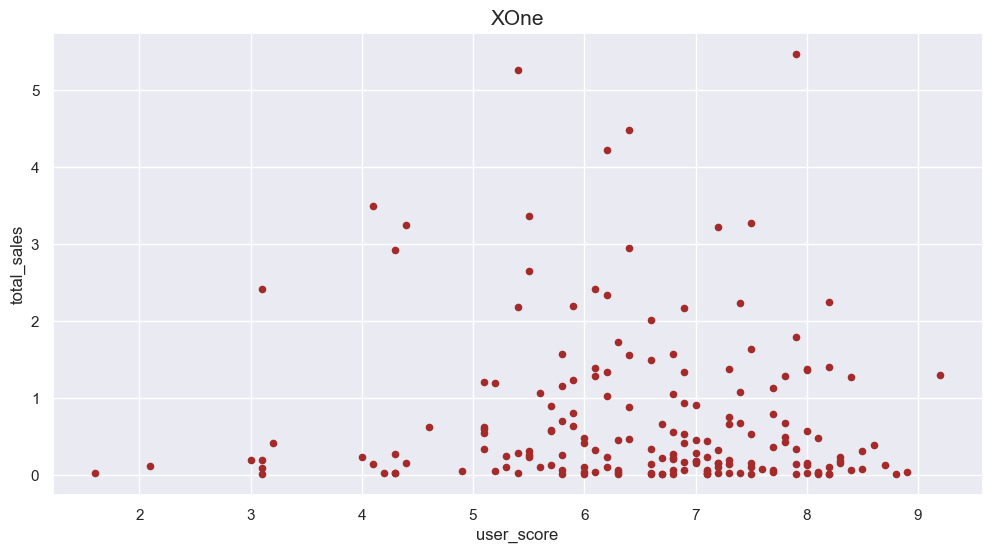

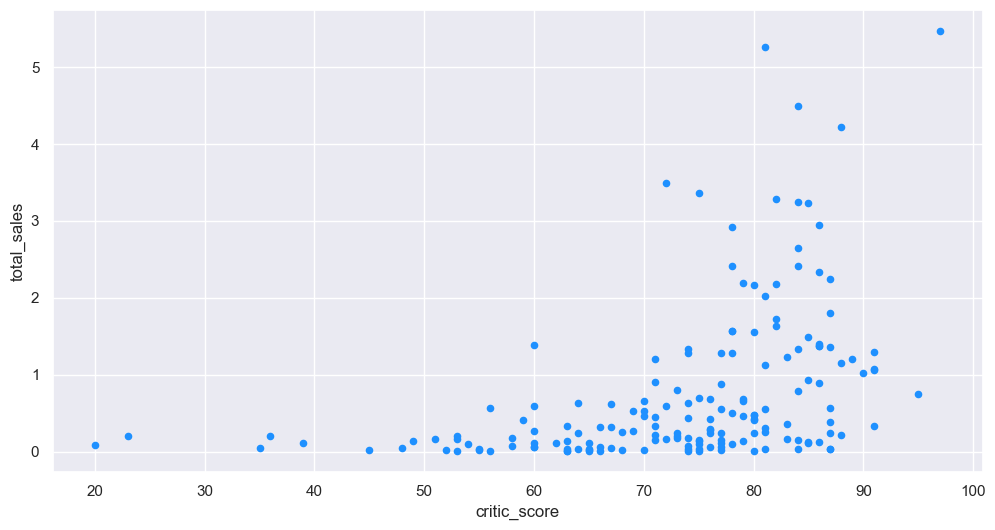

Correlation between user scores and sales: 0.14996531918744113
Correlation between critic scores and sales: 0.1801835624535721


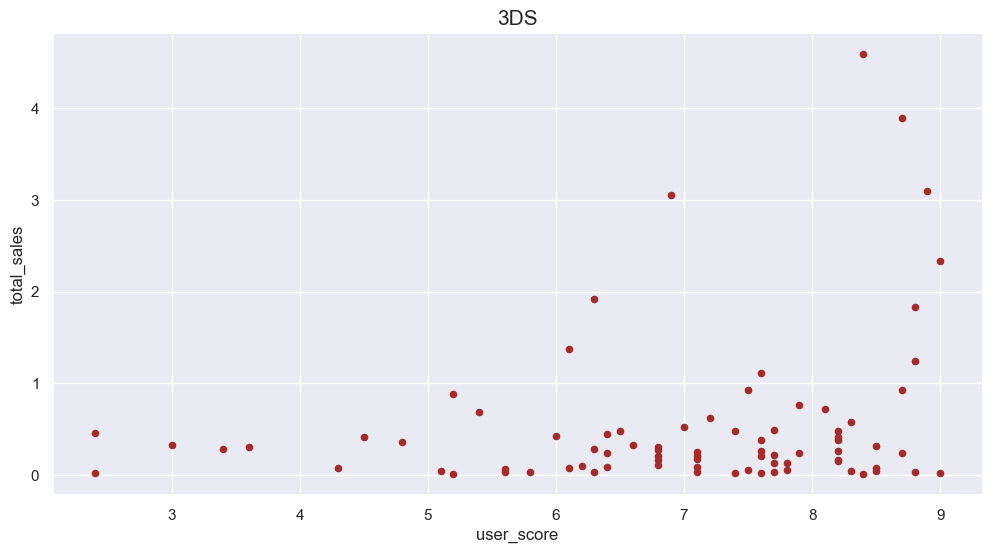

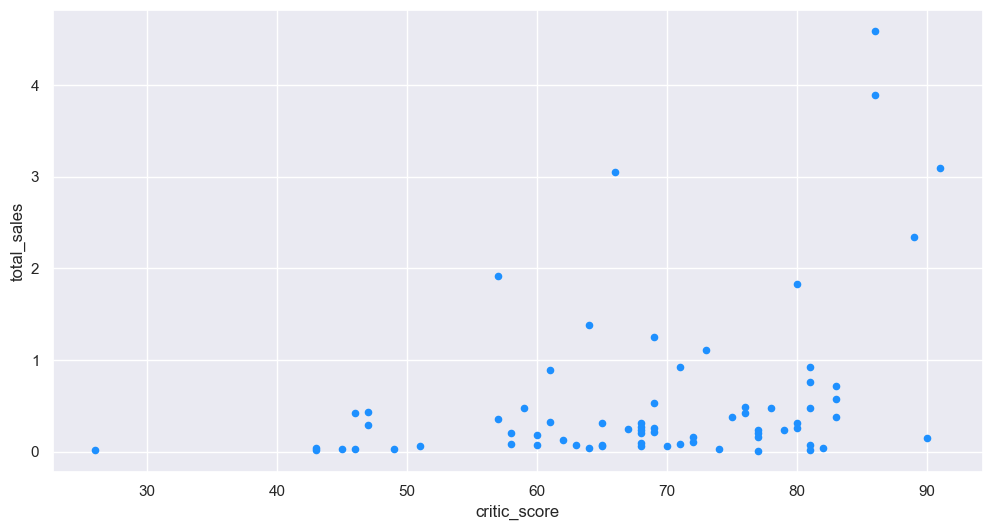

Correlation between user scores and sales: 0.029469650238786196
Correlation between critic scores and sales: 0.03815483215055258


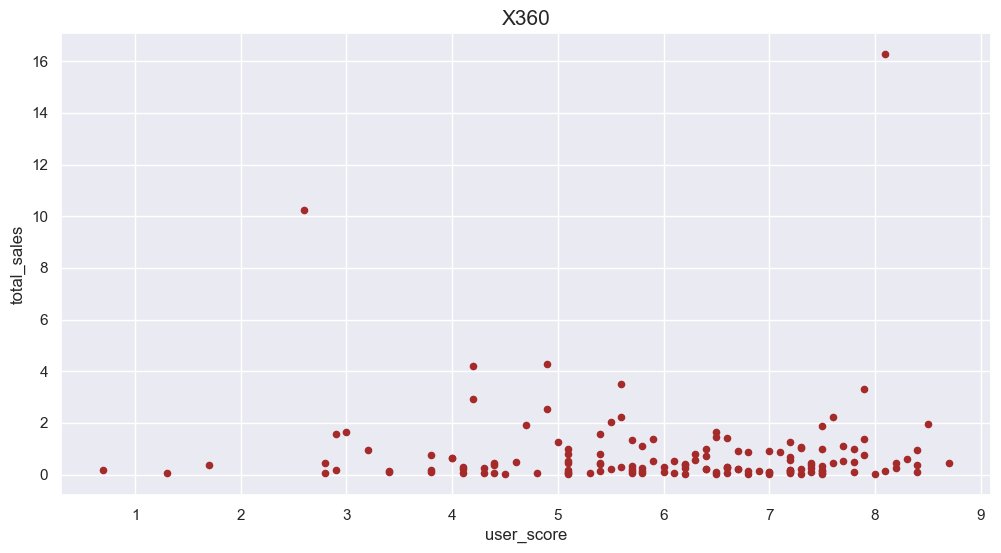

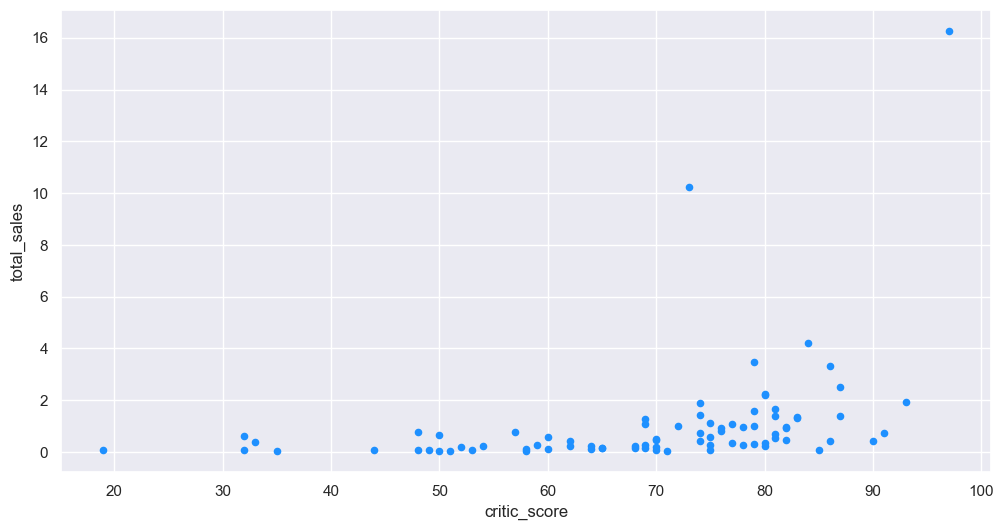

Correlation between user scores and sales: 0.08476461939926712
Correlation between critic scores and sales: 0.16796994952585145


In [65]:
for platform in top_5_platforms:
    all_platform(platform)

* The situation is similar for other platforms as well. According to the results obtained, it can be noted that critic and user scores have a direct, very weak correlation with the "numbers" of sales. In some cases, user ratings do not correlate with sales (e.g. 3DS and X360).

#### Distribution of games by genre

Let's look at the overall distribution of games by genre.

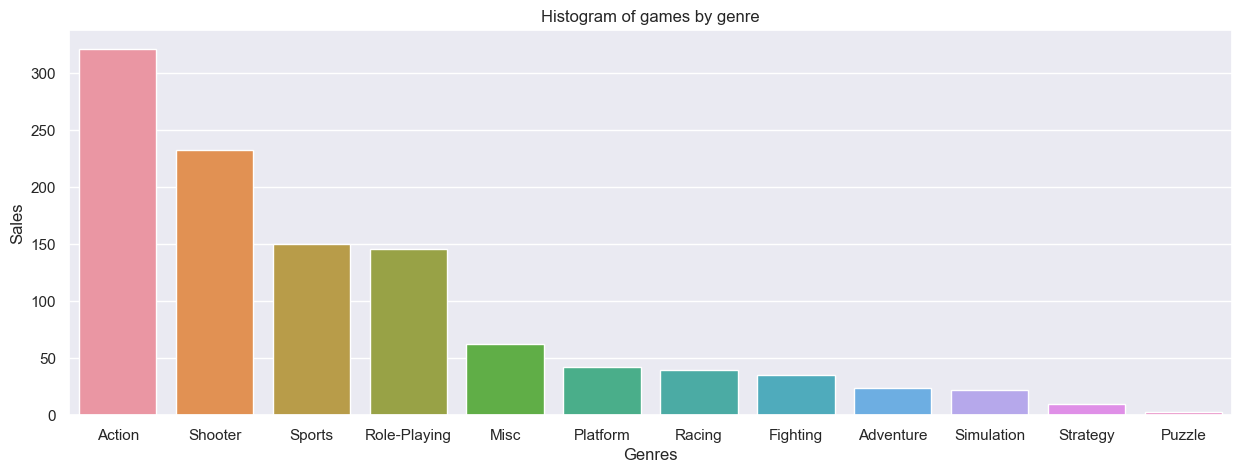

In [66]:
sales_by_genre = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
                                           by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=sales_by_genre.index,y=sales_by_genre['total_sales'])
plt.title("Histogram of games by genre")
plt.xlabel("Genres")
plt.ylabel("Sales");

* According to the bar chart, the top-selling genres are **Action, Shooter, Sports and Role-Playing**. The platforms with low sales are **Puzzle, Strategy, Simulation, Adventure**. Perhaps the results obtained are not entirely accurate and are affected by outliers. Let's compare the results with a more stable estimate of the distribution characteristics using a boxplot.

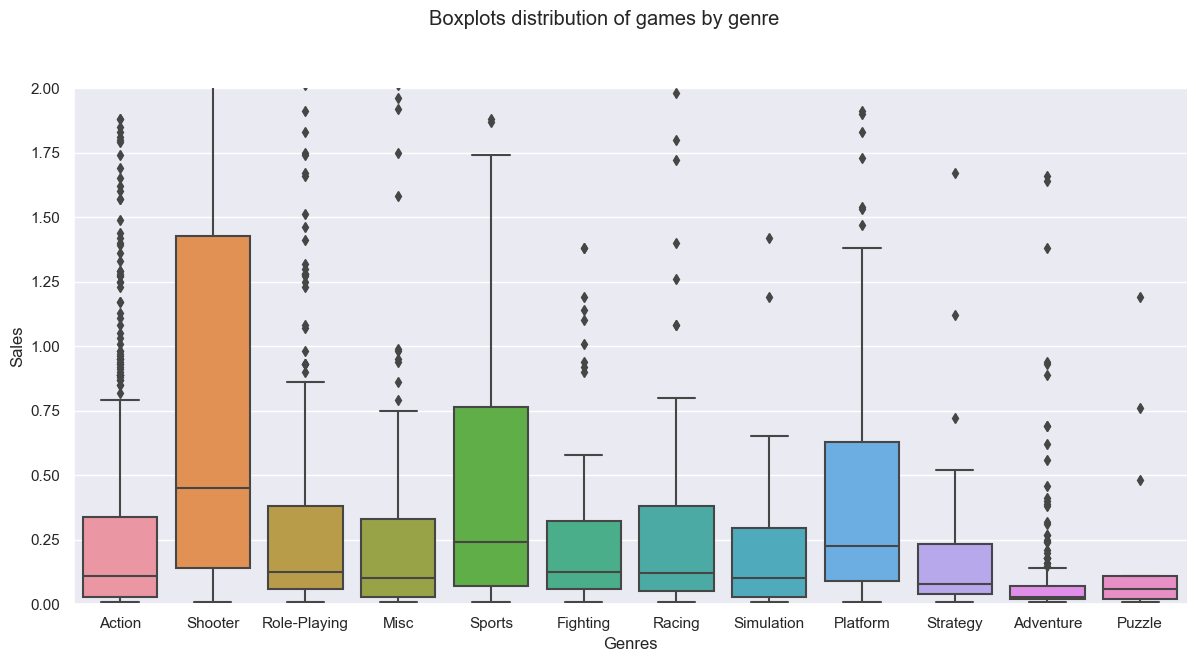

In [67]:
plot_sales_by_genre = sns.catplot(data=actual_period, x='genre', y='total_sales', kind='box', height=6, 
                                  aspect=2, legend_out=False)
plot_sales_by_genre.set(ylim=(0, 2))
plot_sales_by_genre.set_axis_labels(x_var='Genres', y_var='Sales')
plot_sales_by_genre.fig.suptitle('Boxplots distribution of games by genre', y=1.1);

* In fact, the results are different. The results of the box plots show the following: the highest median revenues are in **Shooter, Sports, and Platform**. These games have the most values above the median. **Adventure and Puzzle** have the least.

### Portrait of the user in each region

#### Portrait of a User in North America

In [68]:
# create a function that we will call for each region in the future

def prepare_summary_data(column):
    rows = ['platform', 'genre', 'rating']
    
    # denote the arrangement of the figures and their sizes
    
    fig, axes = plt.subplots(1, 3, figsize=(25, 5)) 
    styled_tables = []
    for col in range(3):
        pivot_table = actual_period.pivot_table(index=rows[col], values=column, aggfunc='sum') \
                                   .sort_values(by=column, ascending=False) \
                                   .reset_index() \
                                   .rename_axis(None, axis=1) \
                                   .head(5)
        
        # To display the three tables side by side, use set_table_attributes 
        # with the argument "style='display:inline".
        
        styler = pivot_table.style.set_table_attributes("style='display:inline'")
        styled_tables.append(styler._repr_html_())
        if col == 2:
            display_html(styled_tables[0]+styled_tables[1]+styled_tables[2], raw=True)

        sns.barplot(data=pivot_table, x=rows[col], y=column, ax=axes[col])
        fig.suptitle('5 most popular platforms, genres and ESRB ratings', fontsize=20)

plt.show()
sns.set()

,platform,na_sales
0,PS4,108.740000
1,XOne,93.120000
2,X360,81.660000
3,PS3,63.500000
4,3DS,38.200000
,genre,na_sales
0,Action,126.050000
1,Shooter,109.740000
2,Sports,65.270000
3,Role-Playing,46.400000


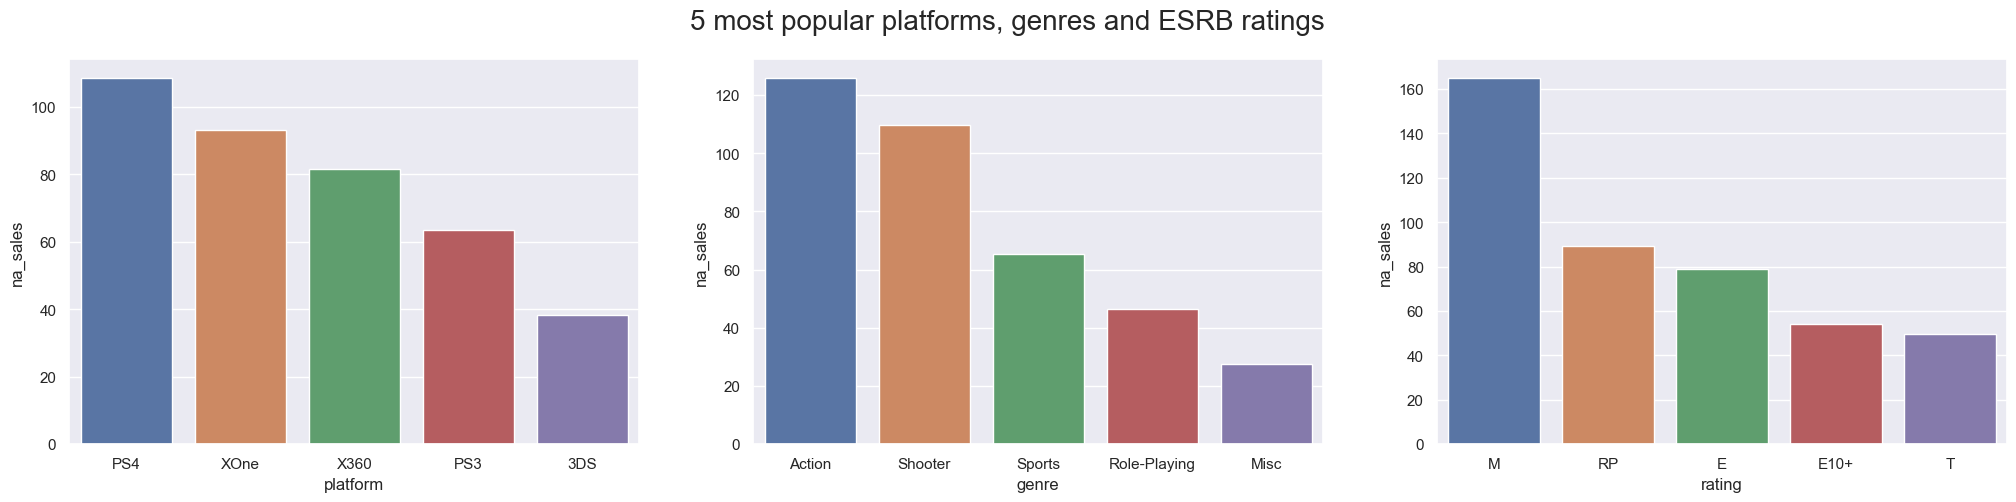

In [69]:
prepare_summary_data('na_sales')

Thus, we can present the portrait of the user in **North America** as follows:
* The most popular gaming **platforms: PS4, XOne, X360, PS3, 3DS**.
* Most popular **genres: Action, Shooter, Sports, Role-Playing, Misc**.
* **ESRB** rating influence on sales: most games are rated "For Adults", second place is occupied by unrated games, and the next place is occupied by games rated "For Everyone". It follows that the influence of the rating is weak.

#### Portrait of a User in Europe

,platform,eu_sales
0,PS4,141.090000
1,PS3,67.810000
2,XOne,51.590000
3,X360,42.520000
4,3DS,30.960000
,genre,eu_sales
0,Action,118.130000
1,Shooter,87.860000
2,Sports,60.520000
3,Role-Playing,36.970000


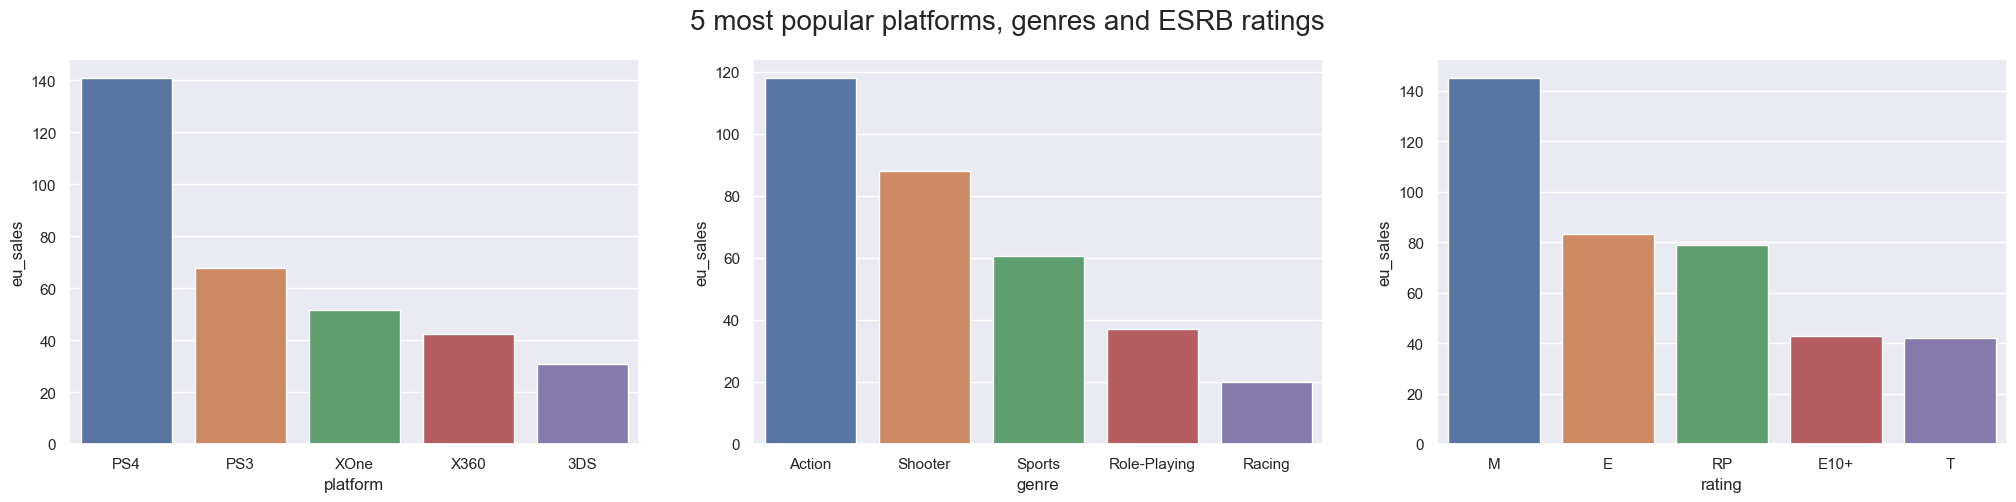

In [70]:
prepare_summary_data('eu_sales')

Thus, we can present the portrait of the user in **Europe** as follows:
* The most popular gaming **platforms: PS4, PS3, XOne, X360, 3DS**.
* The most popular **genres: Action, Shooter, Sports, Role-playing, Racing**.
* **ESRB** rating impact sales: "Adult" rated games lead by a wide margin, followed by "For All" rated games and unrated games, which also allows noting that the rating does not always influence game sales.

#### Portrait of a User in Japan

,platform,jp_sales
0,3DS,67.810000
1,PS3,23.350000
2,PSV,18.590000
3,PS4,15.960000
4,WiiU,10.880000
,genre,jp_sales
0,Role-Playing,51.040000
1,Action,40.490000
2,Misc,9.200000
3,Fighting,7.650000


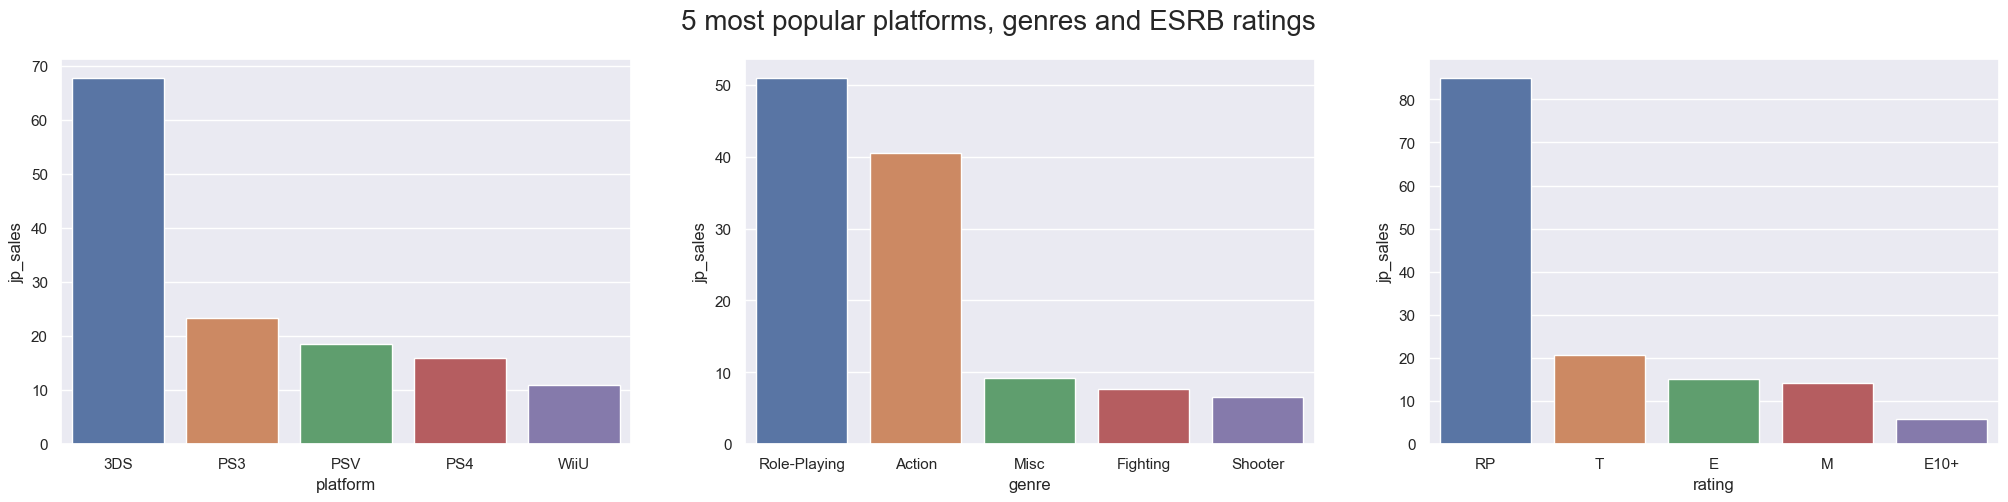

In [71]:
prepare_summary_data('jp_sales')

Thus, we can present a portrait of the user in **Japan** as follows:
* The most popular gaming **platforms: 3DS, PS3, PSV, PS4, WiiU**.
* The most popular **genres: Role-playing, Action, Other, Fighting, Shooter**.
* **ESRB** rating impact sales: Games **without an ESRB rating** sell the most. This may be due to the fact that Japan has its own rating system and does not pay much attention to other international ratings.

### Hypothesis Testing

#### Hypothesis testing: The average user ratings of the Xbox One and PC platforms are the same.
```
H_0: The average user ratings for Xbox One and PC platforms are the same.
H_1: The average user ratings for Xbox One and PC platforms are different.
```

To test the hypothesis of equality of the mean of two general populations for the samples taken from them (we consider two independent samples), the method **skimpy.stats.ttest_ind()** is used.

In [72]:
# Exclude data containing "stubs" for the correct result

actual_period_for_hyp = actual_period[actual_period['user_score'] != -1]

results = st.ttest_ind(
    actual_period_for_hyp.query('platform == "XOne"')['user_score'],
    actual_period_for_hyp.query('platform == "PC"')['user_score'],
    # Let's set a parameter that considers the variances of the samples to be unequal.
    equal_var=False)

# Critical level of statistical significance

alpha = .05
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("The null hypothesis could not be rejected") 

p-value: 0.14759594013430466
The null hypothesis could not be rejected


Therefore, we have no reason to believe that the average user ratings on the Xbox One and PC platforms are meaningfully different.
___

#### Hypothesis Testing: The average user ratings for the Action and Sports genres are different.
```
H_0: The average user ratings of the genres Action and Sports are equal.
H_1: The average user ratings of the genres Action and Sports are different.
    
```

In [73]:
actual_period_for_hyp = actual_period[actual_period['user_score'] != -1]

results = st.ttest_ind(
    actual_period_for_hyp.query('genre == "Action"')['user_score'],
    actual_period_for_hyp.query('genre == "Sports"')['user_score'],
    equal_var=False)

alpha = .05
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("The null hypothesis could not be rejected")

p-value: 1.4460039700704315e-20
Reject the null hypothesis


Therefore, we can assume that the average user ratings for the Action and Sports genres are different.
___

### General Conclusion

We studied historical data on game sales, user and expert reviews, genres and platforms. The following work was done during the research:

✔️ we replaced all cells from 'tbd' to 'NaN' in the user_score column and converted them to the correct (real) data type;

✔️ we removed missing values in the year_of_release, name and genre columns. Data in year_of_releas column was converted to datetime type;

✔️ missing values in the user_score, critic_score, name and genre columns have been replaced with indicator values ("stubs");

✔️ we replaced the obsolete abbreviation "K-A" ("Kids to Adults") with "E" ("Everyone") in the Rating column;

✔️ the missing values in the rating column have been replaced with "RP" (unrated data);

✔️ implicit duplicates in the observations were detected and examined.

Next, all available platform data were examined using the data visualization method. The results of the analysis were as follows.

* The popularity of computer games began to grow in 1996 (thanks to technological advances). By 2008, the popularity of computer games was increasing, the market was developing dynamically, and the total sales were increasing. The popularity of games peaked in 2008-2009. After 2009 sales tend to decline, which may be due to the emergence of iOS and Android mobile platforms and a shift in favor of mobile games during this period.
Most games are sold in North America, followed by Europe, while sales in Japan and other countries are significantly lower.

* For the entire period in question **the highest total sales** were achieved for 6 game platforms - **PS2, X360, PS3, Wii, DS, PS.**

* The average **life cycle** of a platform is approximately **10 years**. All platforms are currently in decline, with some having lost relevance by 2016 (PS, PS2, DS). From 2000 to 2016, PS2 and Wii had the highest sales. In 2016 platforms like Wii, X360, PS2 are still relevant.

* On average, the **popularity** of the platform lasts about **7 years**. Then sales start to decline.

* With the current data selection (the current period is defined as 2013 to 2016), the leaders in sales were the PS3, PS4 and X360. All platforms are declining in sales. In 2016 PS4, 3DS, XOne are leading in sales. Considering the year of release of the platforms (2013, 2011 and 2013 respectively) and the average period of popularity of the platform (about 7 years) **potentially profitable of them could be PS4 and XOne.**

* The most popular platforms are X360, PS4 and XOne: these platforms have the highest median and most of the values are above it. The 3DS has the lowest sales.
 
* In accordance with these results we could also come to a conclusion, that **critic and user ratings show a direct, weak correlation with sales figures**. In some cases user ratings do not correlate with sales (e.g. 3DS and X360).

* The most popular **genres** are Shooter, Sports and Platform.

We've created user portraits for each region:

**in North America**
* The most popular gaming **platforms: PS4, XOne, X360, PS3, 3DS**.
* Most popular **genres: Action, Shooter, Sports, Role-Playing, Misc**.
* **ESRB** rating influence on sales: most games are rated "For Adults", second place is taken by unrated games, and the next place is occupied by games rated "For Everyone". It follows that the influence of the rating is weak.

**in Europe**
* The most popular gaming **platforms: PS4, PS3, XOne, X360, 3DS**.
* The most popular **genres: Action, Shooter, Sports, Role-playing, Racing**.
* **ESRB** rating impact sales: "Adult" rated games lead by a wide margin, followed by "For All" rated games and unrated games, which also allows noting that the rating does not always influence game sales.

**in Japan**
* The most popular gaming **platforms: 3DS, PS3, PSV, PS4, WiiU**.
* The most popular **genres: Role-playing, Action, Other, Fighting, Shooter**.
* **ESRB** rating impact sales: Games **without an ESRB rating** sell the most. This may be due to the fact that Japan has its own rating system and does not pay much attention to other international ratings.

Thus, according to the results of the analysis, it can be noted that the popular products for the sales forecast for 2017 can be PS4 and XOne, and that the most popular genres are shooters, sports and platforms.